Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [3]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [4]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

poly = PolynomialFeatures(1, include_bias=True)

design_matrix = poly.fit_transform(X)
print(design_matrix)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg
# Vaš kôd ovdje

design_matrix_transpose = np.transpose(design_matrix)

w_inv = np.matmul(np.matmul(linalg.inv(np.matmul(design_matrix_transpose, design_matrix)), design_matrix_transpose), y)
print(w_inv)

w_pinv = np.matmul(linalg.pinv(design_matrix), y)
print(w_pinv)


[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143


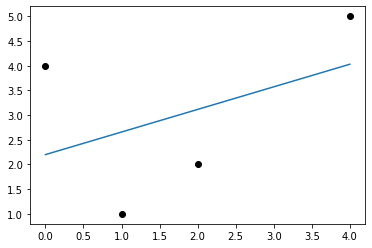

In [6]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

h = np.matmul(design_matrix, np.transpose(w_inv))
plt.plot(X, y, 'o', color='black')
plt.plot(X, h)

error = mean_squared_error(y, h)
print(error)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [7]:
# Vaš kôd ovdje

w_curr = np.matmul(linalg.inv(design_matrix), y)


LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [8]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

reg = LinearRegression().fit(design_matrix, y)
print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(design_matrix)
error = mean_squared_error(prediction, y)
print(error)

[0.         0.45714286]
2.2
2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [9]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    y = []
    for x_i in X:
        y_i = f(x_i[0]) + np.random.normal(0, noise)
        y.append(y_i)
    return np.array(y)
    

In [10]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [11]:
# Vaš kôd ovdje
X = make_instances(-5, 5, 50)
f = lambda x : 5 + x - 2 * x**2 - 5 * x**3
y = make_labels(X, f, 200)
print(y)

[ 813.1572783   627.91744813  582.08572015  526.74800855  618.71966474
  635.67017859  150.30274467 -166.5484576   145.20489147 -288.3346327
 -204.06066237 -310.02121537 -124.65446426  250.07311147 -254.92042946
  428.88416651 -122.54961283   -3.41591744  -74.98425413  -47.21446906
  -29.82132986  -78.36182671  151.43334252 -159.51008181  419.94320558
  -30.57690759   -6.4146467   270.38907736  245.97866607  239.70288695
   62.10904424 -447.06499691  -99.09072456 -347.75665516  551.09578887
  -50.30505146 -197.47893335  -20.01580189  -80.5308686  -119.60730543
 -410.39530136  -59.9673097    20.07886201  -28.75709497 -375.65394124
 -413.46580622 -448.14151303 -521.66261829 -617.16007196 -744.78105495]


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

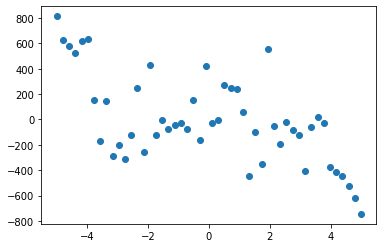

In [12]:
# Vaš kôd ovdje
plt.scatter(X, y)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

46551.45981242829


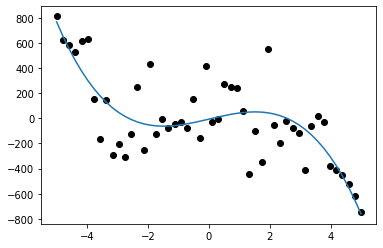

In [13]:
# Vaš kôd ovdje

poly = PolynomialFeatures(3)
design_matrix_2 = poly.fit_transform(X)
w_2 = np.matmul(linalg.pinv(design_matrix_2), y)
h_2 = np.matmul(design_matrix_2, np.transpose(w_2))
plt.plot(X, y, 'o', color='black')
plt.plot(X, h_2)

error = mean_squared_error(h_2, y)
print(error)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

Error with degree 1 is 61822.552100617926
Error with degree 3 is 44900.19105529448
Error with degree 5 is 44690.24169996844
Error with degree 10 is 37795.65445669752
Error with degree 20 is 21034.184918952462


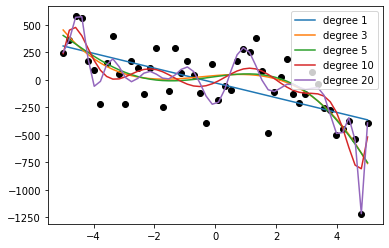

In [101]:
# Vaš kôd ovdje
plt.plot(X, y, 'o', color='black')
for i in [1, 3, 5, 10, 20]:
    poly = PolynomialFeatures(i)
    design_matrix = poly.fit_transform(X)
    w = np.matmul(linalg.pinv(design_matrix), y)
    h = np.matmul(design_matrix, np.transpose(w))
    plt.plot(X, h, label=f'degree {i}')
    plt.legend(loc="upper right")
    error = mean_squared_error(h, y)
    print("Error with degree",i, "is",error)
    
    

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

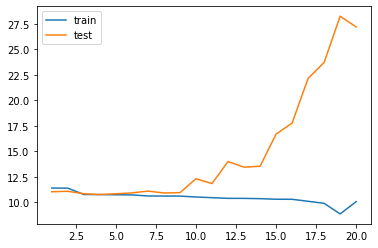

In [15]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

train_errors = []
test_errors = []

for d in range(1, 21):
    poly = PolynomialFeatures(d)
    des_mat_train = poly.fit_transform(X_train)
    w_d = np.matmul(linalg.pinv(des_mat_train), y_train)
    h_train = np.matmul(des_mat_train, w_d)
    
    des_mat_test = poly.fit_transform(X_test)
    h_test = np.matmul(des_mat_test, np.transpose(w_d))
    
    train_errors.append(mean_squared_error(y_train, h_train))
    test_errors.append(mean_squared_error(y_test, h_test))
    
plt.plot(range(1, 21), np.log(train_errors), label="train")
plt.plot(range(1, 21), np.log(test_errors), label="test")
plt.legend(loc="best")

    

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

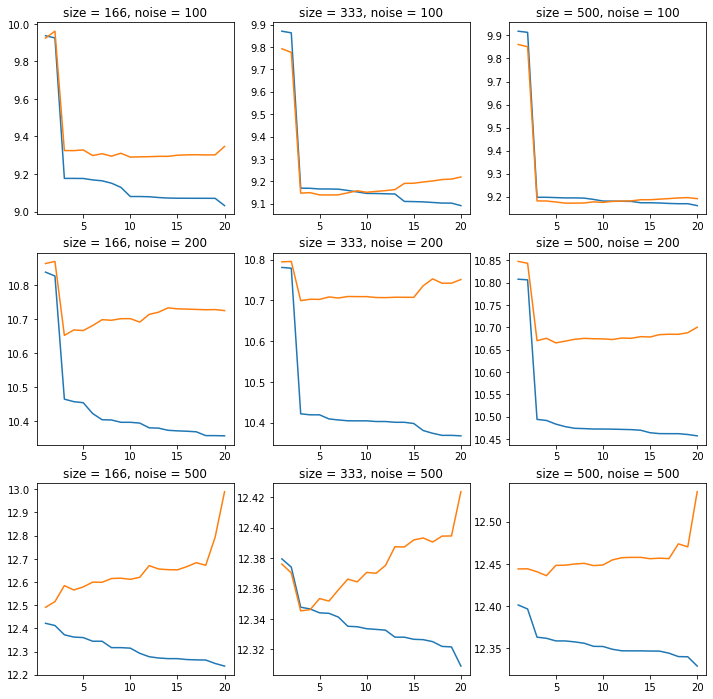

In [187]:
# Vaš kôd ovdje
import random

N_val = [1/3, 2/3, 1]
noise_val = [100, 200, 500]
X = make_instances(-5, 5, 1000)
fig, axs = plt.subplots(3, 3, figsize=(12,12))

counter_i = 0
for sigma in noise_val:
    y = make_labels(X, f, sigma)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    counter_j = 0
    for N in N_val:
        
        rand_indexes_train = random.sample(range(len(X_train)), int(len(X_train)*N))
        rand_indexes_test = random.sample(range(len(X_test)), int(len(X_test)*N))
        
        X_train_adj = []
        y_train_adj = []
        
        X_test_adj = []
        y_test_adj = []
        for i in rand_indexes_train:
            X_train_adj.append(X_train[i])
            y_train_adj.append(y_train[i])
        
        for i in rand_indexes_test:
            X_test_adj.append(X_test[i])
            y_test_adj.append(y_test[i])
        
        train_errors = []
        test_errors = []
        for d in range(1, 21):
            poly = PolynomialFeatures(d)
            des_mat_train = poly.fit_transform(X_train_adj)
            w_d = np.matmul(linalg.pinv(des_mat_train), y_train_adj)
            h_train = np.matmul(des_mat_train, w_d)
    
            des_mat_test = poly.fit_transform(X_test_adj)
            h_test = np.matmul(des_mat_test, np.transpose(w_d))
            
            train_errors.append(mean_squared_error(y_train_adj, h_train))
            test_errors.append(mean_squared_error(y_test_adj, h_test))

        axs[counter_i, counter_j].plot(range(1, 21),np.log(train_errors),label="train")
        axs[counter_i, counter_j].plot(range(1, 21),np.log(test_errors),label="test")
        axs[counter_i, counter_j].set_title(f'size = {int(len(X_train)*N)}, noise = {sigma}')

        counter_j = counter_j + 1
    counter_i = counter_i + 1
    
plt.show()        

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [17]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
poly = PolynomialFeatures(3)
design_matrix = poly.fit_transform(X)
design_matrix_transpose = np.transpose(design_matrix)

w = []
for lambd in [0, 1, 10]:
    identity = np.identity(4)
    identity[0,0] = 0
    w_i = np.matmul(np.matmul(linalg.inv(np.add(np.matmul(design_matrix_transpose, design_matrix), lambd * identity)), design_matrix_transpose), y)
    print("Weigths with factor lamda", lambd, "are", w_i)



Weigths with factor lamda 0 are [ 4.         -5.91666667  3.375      -0.45833333]
Weigths with factor lamda 1 are [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Weigths with factor lamda 10 are [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

Identična je ako ne uzmemo jediničnu matricu, već jediničnu matricu tako da je prvi element jednak nula.

In [18]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

for alpha in [0, 1, 10]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(design_matrix, y)
    print(ridge.coef_)
    print(ridge.intercept_)


[ 0.         -5.91666667  3.375      -0.45833333]
4.000000000000021
[ 0.         -0.69079365 -0.2831746   0.1445805 ]
3.0569614512471652
[ 0.         -0.15897295 -0.13423067  0.0815601 ]
2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

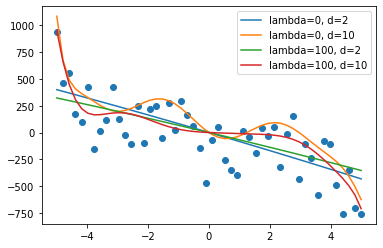

In [19]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
f = lambda x : 5 + x - 2 * x**2 - 5 * x**3
y = make_labels(X, f, 200)

for alpha in [0, 100]:
    for d in [2, 10]:
        poly = PolynomialFeatures(d)
        design_matrix = poly.fit_transform(X)
        ridge = Ridge(alpha=alpha)
        ridge.fit(design_matrix, y)
        h = np.matmul(design_matrix, np.transpose(ridge.coef_))
        
        plt.plot(X, h, label=f'lambda={alpha}, d={d}')
        
plt.scatter(X, y)
plt.legend()
plt.show()


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


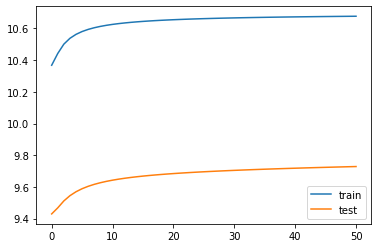

In [51]:
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
poly = PolynomialFeatures(10)
des_mat_train = poly.fit_transform(X_train)
des_mat_test = poly.fit_transform(X_test)
train_errors = []
test_errors = []

for alpha in range(51):
    ridge = Ridge(alpha=alpha)
    ridge.fit(des_mat_train, y_train)
    ridge.coef_[0] = ridge.intercept_
    h_train = np.matmul(des_mat_train, np.transpose(ridge.coef_))
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(des_mat_test, y_test)
    ridge.coef_[0] = ridge.intercept_
    h_test = np.matmul(des_mat_test, np.transpose(ridge.coef_))
    
    train_errors.append(mean_squared_error(y_train, h_train))
    test_errors.append(mean_squared_error(y_test, h_test))
    
plt.plot(range(51), np.log(train_errors), label="train")
plt.plot(range(51), np.log(test_errors), label="test")
plt.legend(loc="best")
    

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [21]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

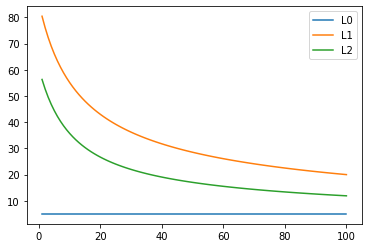

In [42]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
f = lambda x : 5 + x - 2 * x**2 - 5 * x**3
y = make_labels(X, f, 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
poly = PolynomialFeatures(5)
design_matrix = poly.fit_transform(X_train)

L0 = []
L1 = []
L2 = []

for alpha in range(1, 101):
    ridge = Ridge(alpha=alpha)
    ridge.fit(design_matrix, y_train)
    
    L0_val = nonzeroes(ridge.coef_)
    L1_val = sum(abs(ridge.coef_))
    L2_val = np.sqrt(np.matmul(np.transpose(ridge.coef_), ridge.coef_))
    
    L0.append(L0_val)
    L1.append(L1_val)
    L2.append(L2_val)
    
plt.plot(range(1, 101),L0,label="L0")
plt.plot(range(1, 101),L1,label="L1")
plt.plot(range(1, 101),L2,label="L2")
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

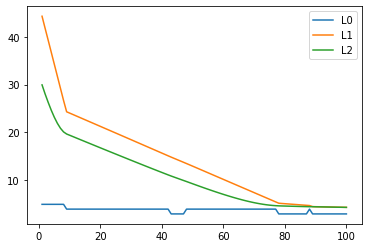

In [48]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
d = 5
poly = PolynomialFeatures(d)
design_matrix = poly.fit_transform(X_train)

L0 = []
L1 = []
L2 = []

for alpha in range(1, 101):
    lasso = Lasso(alpha=alpha)
    lasso.fit(design_matrix, y_train)
    
    L0_val = nonzeroes(lasso.coef_)
    L1_val = sum(abs(lasso.coef_))
    L2_val = np.sqrt(np.matmul(np.transpose(lasso.coef_), lasso.coef_))
    
    L0.append(L0_val)
    L1.append(L1_val)
    L2.append(L2_val)
    
plt.plot(range(1, 101),L0,label="L0")
plt.plot(range(1, 101),L1,label="L1")
plt.plot(range(1, 101),L2,label="L2")
plt.legend()
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [52]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

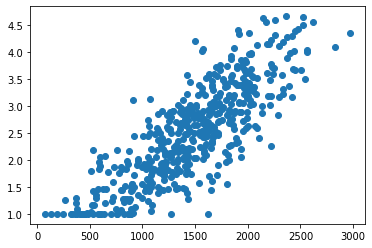

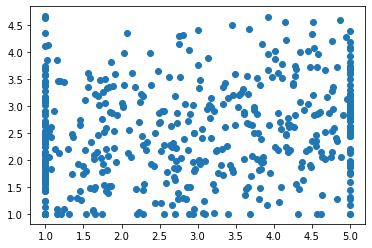

In [57]:
# Vaš kôd ovdje

plt.scatter(exam_score, grades_y)
plt.show()

plt.scatter(grade_in_highschool, grades_y)
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [60]:
# Vaš kôd ovdje
ridge = Ridge(alpha=0.01)
ridge.fit(grades_X, grades_y)

print(ridge.intercept_)
print(ridge.coef_)


0.15061179575775974
[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [72]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

scaler = StandardScaler()
grades_X_fixed = scaler.fit_transform(grades_X)
grades_y_fixed = scaler.fit_transform(grades_y.reshape(-1, 1))

ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed, grades_y_fixed)

print(ridge.intercept_)
print(ridge.coef_)

[8.62551331e-17]
[[0.81630375 0.15167761]]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [144]:
# Vaš kôd ovdje

print(grades_X_fixed_colinear)
grades_X_fixed_colinear = np.column_stack((grades_X_fixed, grades_X_fixed_colinear[:, 1]))
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]
[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [91]:
# Vaš kôd ovdje

ridge = Ridge(alpha=0.01)
ridge.fit(grades_X_fixed_colinear, grades_y_fixed)

print(ridge.intercept_)
print(ridge.coef_)

[8.6255971e-17]
[[0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [165]:
# Vaš kôd ovdje
import random

def column(matrix, i):
    return [row[i] for row in matrix]

weights_1 = []
weights_2 = []

counter = 1
for i in range(10):
    rand_indexes = random.sample(range(len(grades_X_fixed_colinear)), int(len(grades_X_fixed_colinear)/2))
    curr_X = []
    curr_y = []
    for i in rand_indexes:
        curr_X.append(grades_X_fixed_colinear[i])
        curr_y.append(grades_y_fixed[i])
    
    print(f'{counter}. iteration \n')
    for alpha in [0.01, 1000]:
        ridge = Ridge(alpha=alpha)
        ridge.fit(curr_X, curr_y)
        
        if alpha == 0.01:
            weights_1.append(ridge.coef_.flatten().tolist())
            print("Weights for lambda = 0.01 are",ridge.coef_)
        else:
            weights_2.append(ridge.coef_.flatten().tolist())
            print("Weights for lambda = 1000 are",ridge.coef_,"\n")
    counter += 1

print("Standard deviation of w1 for lambda=0.01 is", np.std(column(weights_1, 0)))
print("Standard deviation of w2 for lambda=0.01 is", np.std(column(weights_1, 1)))
print("Standard deviation of w3 for lambda=0.01 is", np.std(column(weights_1, 2)))
print()
print("Standard deviation of w1 for lambda=1000 is", np.std(column(weights_2, 0)))
print("Standard deviation of w2 for lambda=1000 is", np.std(column(weights_2, 1)))
print("Standard deviation of w3 for lambda=1000 is", np.std(column(weights_2, 2)))
    

1. iteration 

Weights for lambda = 0.01 are [[0.81830812 0.0898466  0.0898466 ]]
Weights for lambda = 1000 are [[0.17251696 0.04007931 0.04007931]] 

2. iteration 

Weights for lambda = 0.01 are [[0.80445516 0.09927743 0.09927743]]
Weights for lambda = 1000 are [[0.15550843 0.03926087 0.03926087]] 

3. iteration 

Weights for lambda = 0.01 are [[0.81485387 0.0932664  0.0932664 ]]
Weights for lambda = 1000 are [[0.16177092 0.03695188 0.03695188]] 

4. iteration 

Weights for lambda = 0.01 are [[0.82484273 0.0831726  0.0831726 ]]
Weights for lambda = 1000 are [[0.1693448  0.03691135 0.03691135]] 

5. iteration 

Weights for lambda = 0.01 are [[0.79706678 0.08142963 0.08142963]]
Weights for lambda = 1000 are [[0.17135873 0.04073396 0.04073396]] 

6. iteration 

Weights for lambda = 0.01 are [[0.78447276 0.07986943 0.07986943]]
Weights for lambda = 1000 are [[0.16881571 0.03478179 0.03478179]] 

7. iteration 

Weights for lambda = 0.01 are [[0.76366608 0.10442796 0.10442796]]
Weights for 

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.